In [19]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
import datetime as DT

In [30]:
def df_quarter(date):
    q = {'1':'-03-31', '2':'-06-30', '3':'-09-30', '4':'-12-31'}
    date = re.sub('T(\d)', lambda match, q=q: q[match.group(1)], date)
    return DT.datetime.strptime(date, '%Y-%m-%d')


covid_df = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv',
                    thousands='.', 
                    decimal = ',',
                    na_values=[".."])
# paro_df.columns = ['Sexo','ccaa','Edad','Periodo','Total' ]
covid_df.info()
covid_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302210 entries, 0 to 1302209
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   provincia_iso  1277640 non-null  object
 1   sexo           1302210 non-null  object
 2   grupo_edad     1302210 non-null  object
 3   fecha          1302210 non-null  object
 4   num_casos      1302210 non-null  int64 
 5   num_hosp       1302210 non-null  int64 
 6   num_uci        1302210 non-null  int64 
 7   num_def        1302210 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 79.5+ MB


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1302205,ZA,NC,50-59,2022-03-29,0,0,0,0
1302206,ZA,NC,60-69,2022-03-29,0,0,0,0
1302207,ZA,NC,70-79,2022-03-29,0,0,0,0
1302208,ZA,NC,80+,2022-03-29,0,0,0,0


## Fechas de las olas

In [11]:
olas = ["2020-04-01","2020-08-02","2020-12-01","2021-04-01","2021-07-01","2021-12-01"]

olas_name = ["1ª ola","2ª ola","3ª ola","4ª ola","5ª ola","6ª ola"]

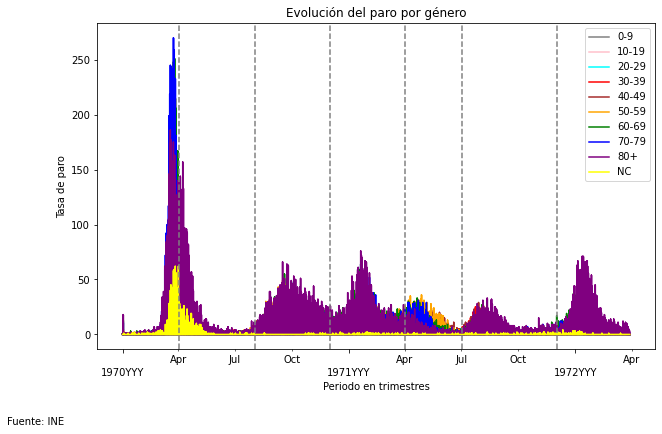

In [61]:
import matplotlib.dates
plt.rcParams["figure.figsize"]=[10,6]

fuente= "Fuente: INE"
grupos_edad = pd.unique(covid_df['grupo_edad']).tolist() # Obtenemos la lista para iterar
paleta_edad = {'0-9':'gray','10-19':'pink','20-29':'cyan','30-39':'red','40-49':'brown','50-59':'orange','60-69':'green','70-79':'blue','80+':'purple','NC':'yellow'} # dict para asignar color

fmt = '%.0f%%' # Formato de los ticks'

fig, ax = plt.subplots () # Creamos el contenedor y el eje
for grupo in grupos_edad: # Iteramos por género
    x = covid_df[covid_df['grupo_edad'] == grupo].fecha # Valor eje x
    y = covid_df[covid_df['grupo_edad'] == grupo].num_hosp #valor eje y
    
    color=paleta_edad[grupo] #color línea
    ax.plot(x, y, label=grupo, color=color) # Pintamos la gráfica
    ax.fill_between(x, y,  color=color,  alpha=0.5) # Pintamos la gráfica
    #ax.step(x, y, label=genero, color=color) # Pintamos la gráfica
  
for i in range (0,len(olas)):
   ax.axvline(x=olas[i], color='grey',linestyle ='--')
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%YYYY"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
# ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución del paro por género")  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda por defecto.
#ax.legend(title ="Sexo", labels =["H","M"])  # Añadimos leyenda específica.
#ax.legend (bbox_to_anchor = (1.25,0.6)) # Sacar la leyenda fuera de la gráfica
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #añadimos el caption manualmente

plt.show()